In [125]:
# We will try to classify emails as spam (1), not spam (0), based on the 
# number of times an exclamaition mark (!) or a dollar sign ($) appears
# in a message. The data file, DemoHHI.csv, contains 4601 emails classified
# as y=0 (not spam) or y=1 (spam), together with the frequency of the "!"
# and "$" character in a message (expressed as a percentage of the total number
# of characters)

In [126]:
import pandas as pd

In [127]:
import numpy as np

In [128]:
spam_df = pd.read_csv('DemoHHI.csv')
churn_df =  pd.read_csv('Cellphone.csv')

In [129]:
spam_df.head()

,ID,Exclamation,Dollar,Spam,DemoPartition
0,406,0.369,0.109,1,t
1,790,0.347,0.000,1,t
2,830,0.123,0.278,1,t
3,914,0.000,0.210,1,t
4,1010,1.272,0.254,1,t


In [130]:
churn_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2


In [131]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4601 non-null   int64  
 1   Exclamation    4601 non-null   float64
 2   Dollar         4601 non-null   float64
 3   Spam           4601 non-null   int64  
 4   DemoPartition  4601 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 179.9+ KB


In [132]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            2151 non-null   int64  
 1   AccountWeeks     2151 non-null   int64  
 2   ContractRenewal  2151 non-null   int64  
 3   DataPlan         2151 non-null   int64  
 4   DataUsage        2151 non-null   float64
 5   CustServCalls    2151 non-null   int64  
 6   DayMins          2151 non-null   float64
 7   DayCalls         2151 non-null   int64  
 8   MonthlyCharge    2151 non-null   float64
 9   OverageFee       2151 non-null   float64
 10  RoamMins         2151 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 185.0 KB


![Classification_tree.JPG](attachment:Classification_tree.JPG)

In [133]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [134]:
#split dataset in features (X) and target variable (y)
X = spam_df[['Exclamation','Dollar']] 
y = spam_df['Spam']

In [135]:
X_churn = churn_df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y_churn = churn_df['Churn']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [137]:
X_churn_train, X_churn_test, y_churn_train, y_churn_test = train_test_split(X_churn, y_churn, test_size=0.3, random_state=1) # 70% training and 30% test

In [138]:
# Maximum depth of the tree can be used as a control variable (hyperparameter) for 
# pre-pruning the tree. In the following the example we set max_depth=2. 

In [139]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [140]:
clf_churn = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_churn3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [141]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf1 = clf1.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)

In [142]:
clf_churn = clf_churn.fit(X_churn_train, y_churn_train)
clf_churn3 = clf_churn3.fit(X_churn_train, y_churn_train)

In [143]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

In [144]:
y_churn_pred = clf_churn.predict(X_churn_test)
y_churn_pred3 = clf_churn3.predict(X_churn_test)

In [145]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy(d=2):",metrics.accuracy_score(y_test, y_pred))

Accuracy(d=2): 0.8044895003620565


In [146]:
print("Accuracy(d=1):",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy(d=3):",metrics.accuracy_score(y_test, y_pred3))
print("Accuracy(d=4):",metrics.accuracy_score(y_test, y_pred4))

Accuracy(d=1): 0.7885590152063722
Accuracy(d=3): 0.836350470673425
Accuracy(d=4): 0.8457639391745112


In [147]:
print("Accuracy churn(d=2):", metrics.accuracy_score(y_churn_test, y_churn_pred))
print("Accuracy churn(d=3):", metrics.accuracy_score(y_churn_test, y_churn_pred3))

Accuracy churn(d=2): 0.8312693498452013
Accuracy churn(d=3): 0.848297213622291


In [148]:
# Visualizing the Decision Tree
# Use Scikit-learn's export_graphviz function for display the tree 
# within the Jupyter notebook. For plotting a tree, you also need 
# graphviz and pydotplus. The
# export_graphviz function converts decision tree classifier into dot file 
# and pydotplus convert this dot file to png or displayable form on Jupyter.

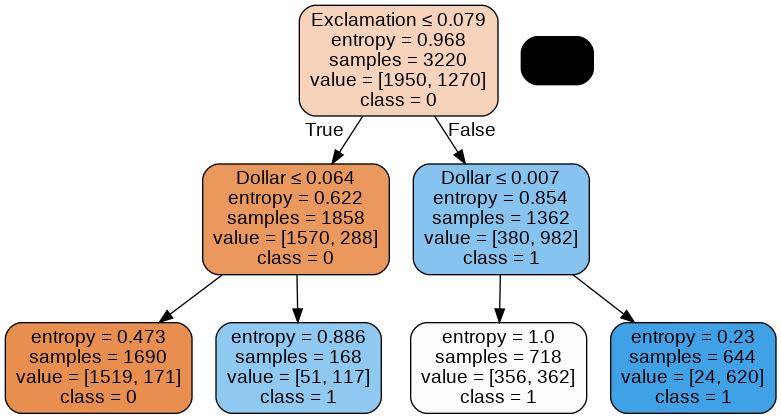

In [149]:
feature_cols = ['Exclamation','Dollar']
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spam.png')
Image(graph.create_png())

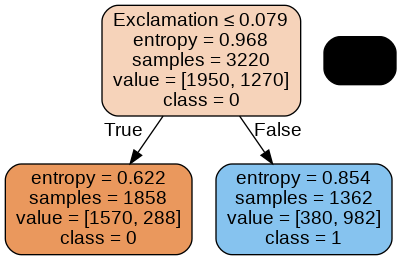

In [150]:
feature_cols = ['Exclamation','Dollar']
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spam.png')
Image(graph.create_png())

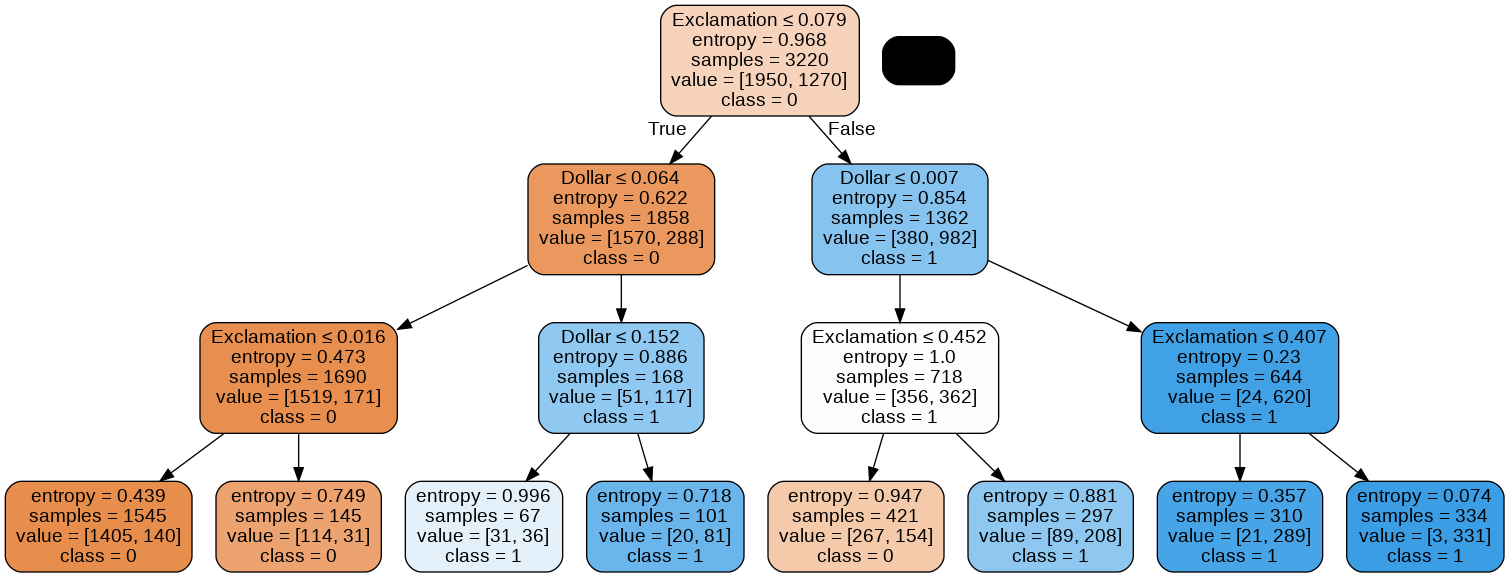

In [151]:
feature_cols = ['Exclamation','Dollar']
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spam.png')
Image(graph.create_png())

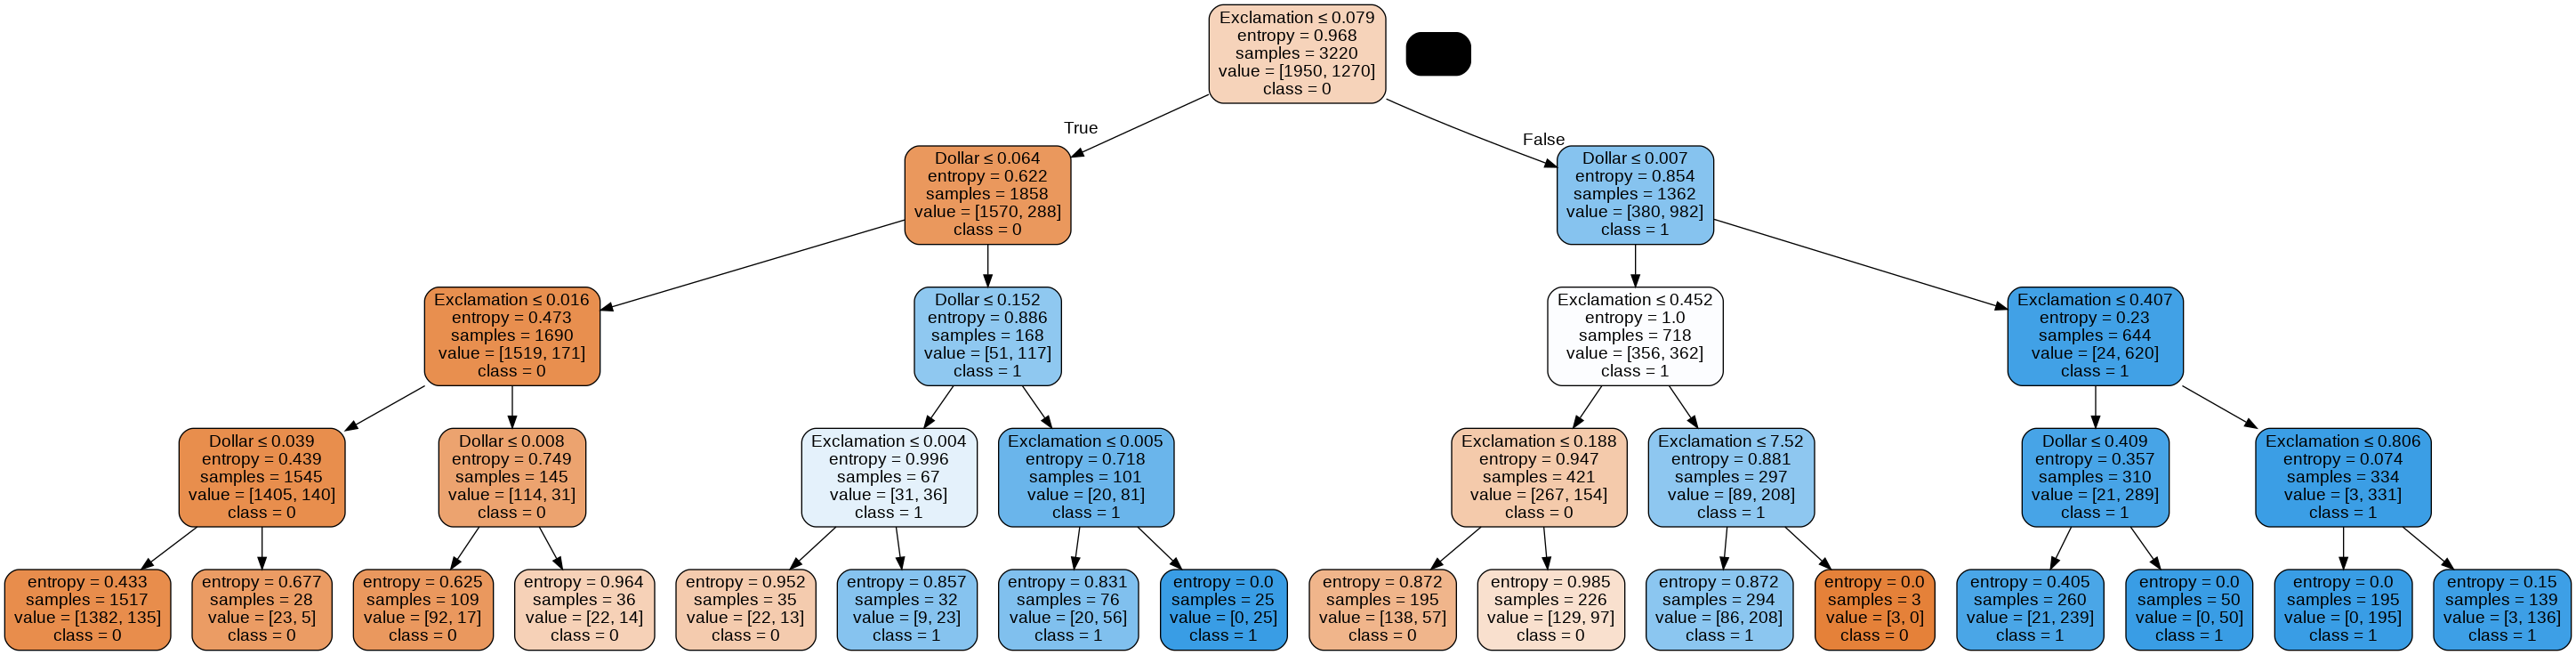

In [152]:
feature_cols = ['Exclamation','Dollar']
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spam.png')
Image(graph.create_png())

In [153]:
# How to read the decision tree, which has a max_depth = 2 in this case:
# Start from above. The training sample consists of 3220 emails, 1950 of class 0 (no spam)
# and 1270 of class 1 (spam). The exact numbers can vary somewhat as there is random 
# split of data. Lets take the left-most branch as an example. If the frequency of "!" characters
# is less or equal 0.079 and the frequency of "$" characters less or equal to 0.064, then
# class = 0 (no-spam). Note that there is not a perfect classification using this rule,
# as 1519 e-mails were classified correctly, but 171 were misclassified (again exact numbers
# may vary somewhat)

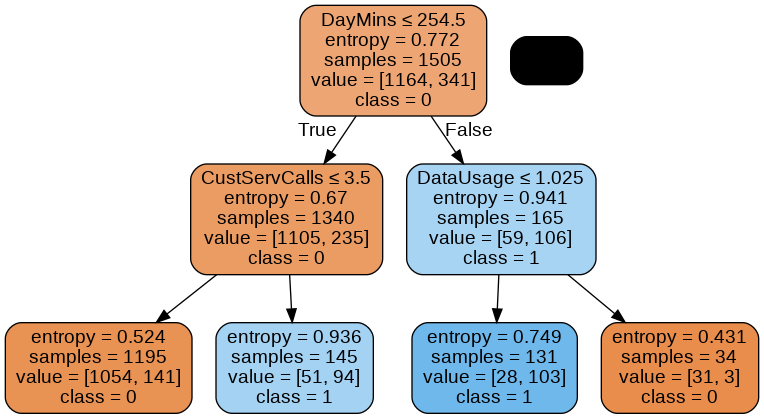

In [154]:
feature_cols = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
# from six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
dot_data_churn = StringIO()
export_graphviz(clf_churn, out_file=dot_data_churn,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph_churn = pydotplus.graph_from_dot_data(dot_data_churn.getvalue())  
graph_churn.write_png('churn.png')
Image(graph_churn.create_png())

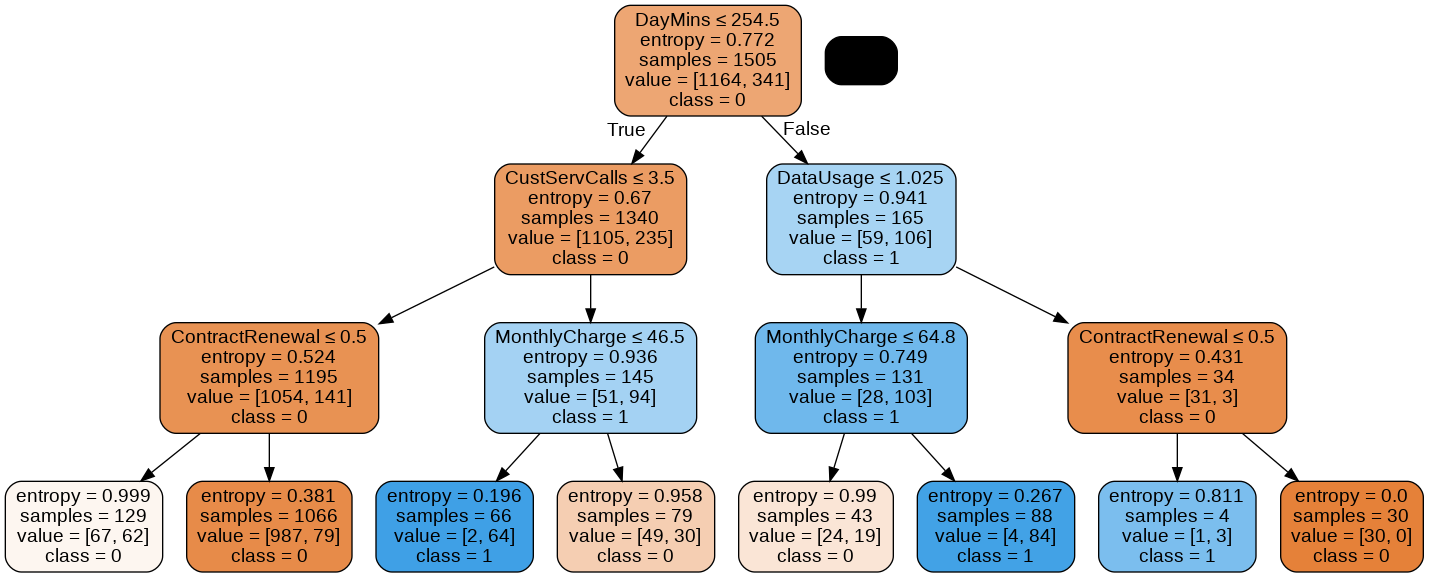

In [155]:
feature_cols = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
# from six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
dot_data_churn = StringIO()
export_graphviz(clf_churn3, out_file=dot_data_churn,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph_churn = pydotplus.graph_from_dot_data(dot_data_churn.getvalue())  
graph_churn.write_png('churn.png')
Image(graph_churn.create_png())